In [2]:
import cv2
import glob
import numpy as np
import os
from io import StringIO
import pandas as pd

In [3]:
%%time
img_width, img_height = 350,350

images = []
files = glob.glob('Images/*.jpg')
for myFile in sorted(files):
    image = cv2.imread(myFile)
    images.append(image)
myarray = np.asarray(images)

data = myarray.reshape(5500, img_width,img_height,3)
data=data/255.


ratings = pd.read_excel('All_Ratings.xlsx')
filenames = ratings.groupby('Filename').size().index.tolist()
labels = []
for filename in filenames:
    df = ratings[ratings['Filename'] == filename]
    score = round(df['Rating'].mean(), 2)
#     labels.append({'Filename': filename, 'score': score})
    labels.append(score)

# labels_df = pd.DataFrame(labels)
label=np.array(labels)
label=label.reshape(5500,1)

CPU times: user 2min 35s, sys: 9.07 s, total: 2min 44s
Wall time: 2min 56s


In [4]:
print(data.shape)
print(label.shape)

(5500, 350, 350, 3)
(5500, 1)


In [5]:
import matplotlib.pyplot as plt
i = 0
img = data[i]*255.0
img_out = np.copy(img)
img=img.astype(np.uint8)
pic = np.asarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(pic)
print(label[i])

[2.33]


In [6]:
data.shape

(5500, 350, 350, 3)

In [7]:
dataReshape=data.reshape(5500,-1)

In [8]:
dataReshape.shape

(5500, 367500)

[3.43]


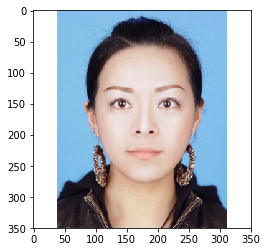

In [9]:
i = 1
img=dataReshape[i]
img=img.reshape(350,350,3)*255.0
img.shape
img_out = np.copy(img)
img=img.astype(np.uint8)
pic = np.asarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(pic)
print(label[i])

In [10]:
%%time
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataReshape,label,test_size=0.1,shuffle=False)

CPU times: user 4.86 s, sys: 30.5 s, total: 35.3 s
Wall time: 1min 43s


In [11]:
x_train.shape

(4950, 367500)

In [12]:
y_train.shape

(4950, 1)

In [35]:
y=y_train.tolist()
y[i][0]


3.43

In [13]:
def getLabelOnly5Class(y_ndarray):
    labelList=list()
    y=y_ndarray
    for i in range(len(y)):
        labelList.append(round(y[i][0]))
    ndarrayY=np.array(labelList)
    ndarrayY=ndarrayY.astype(np.int)
    return ndarrayY

newYTrain=getLabelOnly5Class(y_train)
newYTest=getLabelOnly5Class(y_test)

# def getLabelOnly(y_ndarray):
#     y=y_ndarray.tolist()
#     labelList=list()
#     for i in range(len(y)):
# #         print(y[i]['score'])
# #         labelList.append(y[i]['score'])
#         labelList.append(y[i]['score'])
#     ndarrayY=np.array(labelList)
#     ndarrayY=ndarrayY.astype(np.float32)
#     return ndarrayY
# newYTrain=getLabelOnly(y_train)
# newYTest=getLabelOnly(y_test)

In [14]:
newYTrain

array([2, 3, 3, ..., 3, 4, 2])

In [ ]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(x_train)
X_train_reduction=pca.transform(x_train)
X_test_reduction=pca.transform(x_test)

In [ ]:
np.save('x_train.npy', x_train)
np.save('y_train.npy', y_train)
np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)
np.save('x_train_reduction.npy', X_train_reduction)
np.save('x_test_reduction.npy', X_test_reduction)

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=50)
#neigh.fit(X_train_reduction,trainY)
neigh.fit(X_train_reduction,newYTrain)

In [ ]:
%%time
neigh.score(X_test_reduction,newYTest)

In [ ]:
%%time
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_train_reduction, newYTrain) 

In [ ]:
clf.score(X_test_reduction,newYTest)

In [ ]:
# %%time
# from sklearn.svm import SVR
# poly_svr = SVR(kernel='linear')
# poly_svr.fit(X_train_reduction, newYTrain)

In [ ]:
# poly_svr.score(X_test_reduction,newYTest)

In [ ]:
test_on_testdata=x_test[0:30,:]
test_on_testlabel=y_test[0:30,]

# test_on_testdata.shape
# test_on_testlabel.shape
test_on_testdata_PCA=pca.transform(test_on_testdata)

In [ ]:

preds = clf.predict(test_on_testdata_PCA)

plt.figure(figsize=(16, 8))
for i, img in enumerate(test_on_testdata):
    plt.subplot(4, 8, i+1)
    plt.title(preds[i])
    plt.axis('off')
    img = cv2.cvtColor(img.reshape(img_width,img_height,3), cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())

In [ ]:
import scipy.ndimage
my_photo = scipy.ndimage.imread('./img/yyp.jpg')
my_photo.shape

In [ ]:
# import lycon
# my_photo = lycon.resize(my_photo, width=img_width, height=img_height, interpolation=lycon.Interpolation.CUBIC)

In [ ]:
plt.imshow(my_photo)

In [ ]:
# my_photo=my_photo.reshape(350*350*3)

In [ ]:
# my_photo.shape

In [ ]:
my_photo=my_photo.reshape(1,350*350*3)

In [ ]:
my_photo.shape

In [ ]:
myimgPCA=pca.transform(my_photo)

In [ ]:
clf.predict(myimgPCA)

In [ ]:
neigh.predict(myimgPCA)

In [ ]:
img_test_list = sorted(glob.glob('img/*.jpg'))

imgs_test_resized = []

plt.figure(figsize=(16, 6))
for i, img_path in enumerate(img_test_list):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (350, 350))

    plt.subplot(2, 6, i+1)
    plt.axis('off')
    img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())
    
    img_resized = img_resized.astype(np.float32) / 255.
    imgs_test_resized.append(img_resized)

imgs_test_resized = np.array(imgs_test_resized, dtype=np.float32)

In [ ]:
imgs_test_resized=imgs_test_resized.reshape(len(img_test_list),350*350*3)

In [ ]:
imgs_test_resized.shape

In [ ]:
imgs_test_PCA=pca.transform(imgs_test_resized)

In [ ]:
preds = clf.predict(imgs_test_PCA)

In [ ]:
preds

In [ ]:
plt.figure(figsize=(16, 6))
for i, img in enumerate(imgs_test_resized):
    plt.subplot(2, 6, i+1)
    plt.title('%d' % (preds[i]))
    plt.axis('off')
    img = cv2.cvtColor(img.reshape(img_width,img_height,3), cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())